*** Consider the following data: ***

| Site I 	| Site II 	| Site III 	| Site IV 	|
|--------	|---------	|----------	|---------	|
| 93     	| 85      	| 100      	| 96      	|
| 120    	| 45      	| 75       	| 58      	|
| 65     	| 80      	| 65       	| 95      	|
| 105    	| 28      	| 40       	| 90      	|
| 115    	| 75      	| 73       	| 65      	|
| 82     	| 70      	| 65       	| 80      	|
| 99     	| 65      	| 50       	| 85      	|
| 87     	| 55      	| 30       	| 95      	|
| 100    	| 50      	| 45       	| 82      	|
| 90     	| 40      	| 50       	|         	|
| 78     	|         	| 45       	|         	|
| 95     	|         	| 55       	|         	|
| 93     	|         	|          	|         	|
| 88     	|         	|          	|         	|
| 100    	|         	|          	|         	|

*** These figures provide the depths (in centimeters) at which important archaeological finds were made at four sites in New Mexico (see Woosley and Mcintyre, 1996). Store these data in your R workspace, with one vector containing depth and the other vector containing the site of each observation. ***

*** a. Produce side-by-side boxplots of the depths split by group, and use additional points to mark the locations of the sample means***

In [27]:
site1 <- c(93,120,65,105,115,82,99,87,100,90,78,95,93,88,100)
site2 <- c(85,45,80,28,75,70,65,55,50,40)
site3 <- c(100,75,65,40,73,65,50,30,45,50,45,55)
site4 <- c(96,58,95,90,65,80,85,95,82)
lenthOfEachSite <- c(length(site1),length(site2),length(site3),length(site4))
mydata <- data.frame(name = c(rep("Site1", length(site1)), rep("Site2", length(site2)), rep("Site3", length(site3))
                    , rep("Site4", length(site4))), values = c(site1,site2,site3,site4))
meanValue <- tapply(mydata$values, INDEX = mydata$name, FUN = mean)


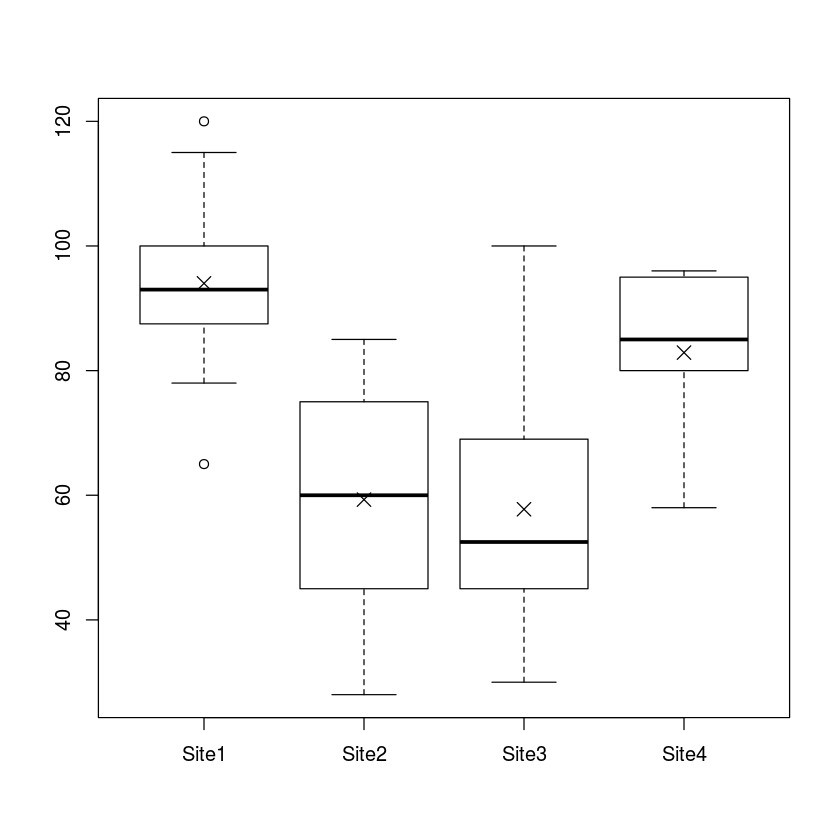

In [26]:
boxplot(mydata$values~mydata$name)
points(1:4, meanValue, pch = 4, cex = 1.5 )

*** b. Assuming independence, execute diagnostic checks for normality and equality of variances. ***

In [28]:
site.sds <- tapply(mydata$values, INDEX =  mydata$name, FUN = sd)
max(site.sds)/min(site.sds)

[1] 1.399928

This informal result indicates that it's reasonable to make the assumption

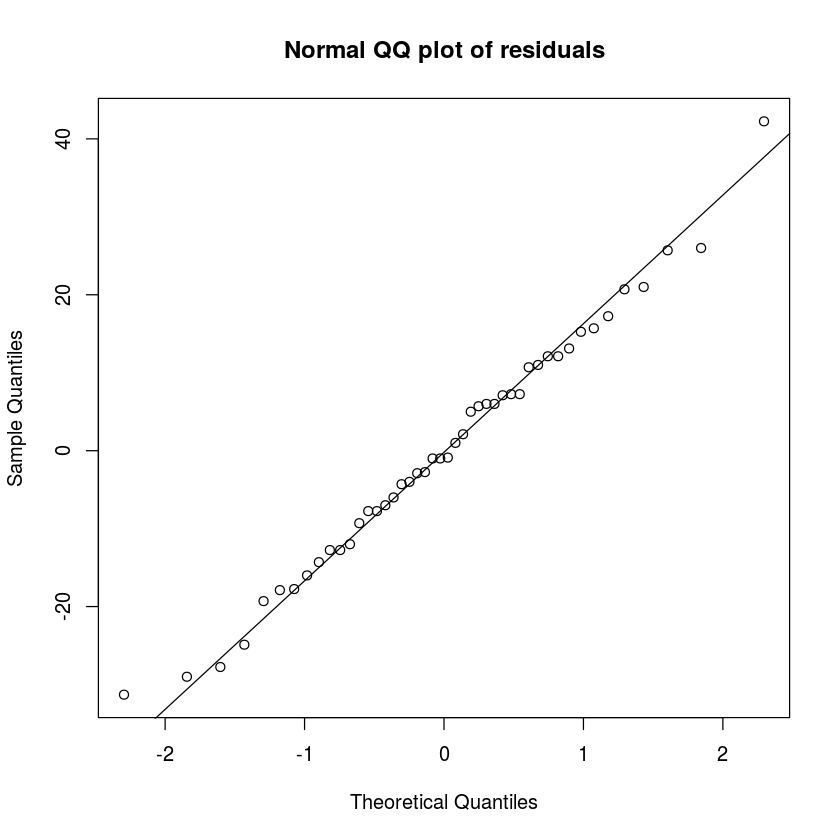

In [30]:
site.meancen <- mydata$values - meanValue[as.numeric(mydata$name)]
qqnorm(site.meancen, main = "Normal QQ plot of residuals")
qqline(site.meancen)

*** c. Perform and conclude a one-way ANOVA test for evidence of a difference between the means. ***

In [31]:
site.anova <- aov(values~name, data = mydata)
summary(site.anova)

            Df Sum Sq Mean Sq F value   Pr(>F)    
name         3  12009    4003   14.94 9.18e-07 ***
Residuals   42  11251     268                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Since p-value <<0. we can reject Ho

*** In Section 14.4, you looked at the data set providing measurements on petal and sepal sizes for three species of iris flowers. This is available in R as iris. ***

*** d. Based on diagnostic checks for normality and equality of variances, decide which of the four outcome measurements (sepal
length/width and petal length/width) would be suitable for ANOVA (using the species as the group variable). ***

In [15]:
iris[1:4,]

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa


Ratio between max and min:  1.803967

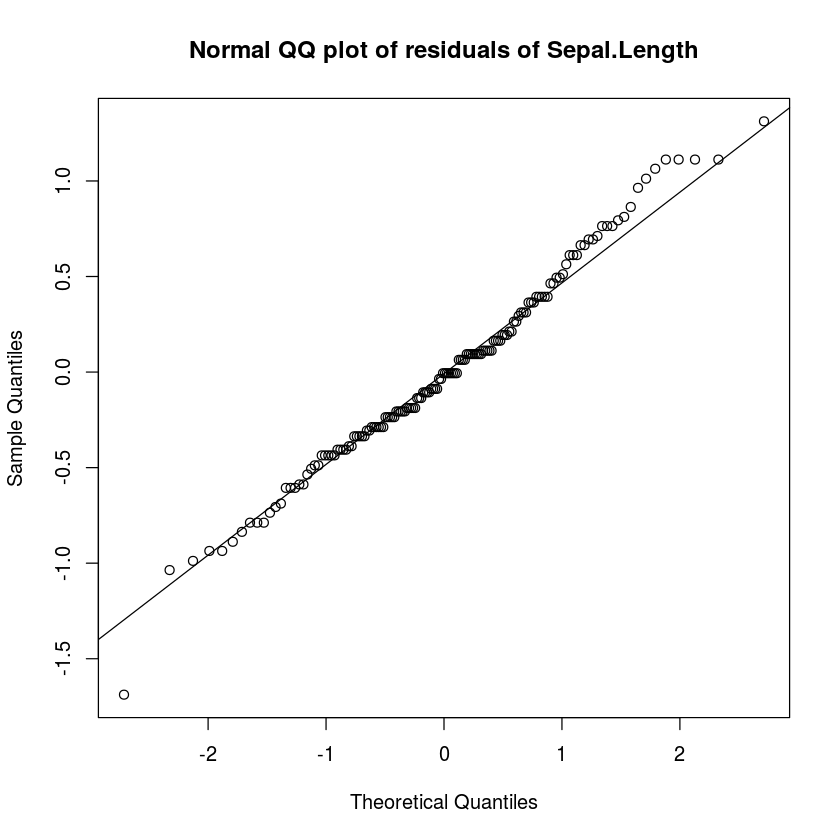

In [27]:
sepal.length.mean <- tapply(iris$Sepal.Length, INDEX = iris$Species, FUN = mean)
sepal.width.mean <- tapply(iris$Sepal.Width, INDEX = iris$Species, FUN = mean)
petal.length.mean <- tapply(iris$Petal.Length, INDEX = iris$Species, FUN = mean)
petal.width.mean <- tapply(iris$Petal.Width, INDEX = iris$Species, FUN = mean)

sepal.length.sd <- tapply(iris$Sepal.Length, INDEX = iris$Species, FUN = sd)
sepal.width.sd <- tapply(iris$Sepal.Width, INDEX = iris$Species, FUN = sd)
petal.length.sd <- tapply(iris$Petal.Length, INDEX = iris$Species, FUN = sd)
petal.width.sd <- tapply(iris$Petal.Width, INDEX = iris$Species, FUN = sd)

#Sepal.length vs. Species
cat("Ratio between max and min: ",max(sepal.length.sd)/min(sepal.length.sd))
sepal.length.meancen <- iris$Sepal.Length-sepal.length.mean[as.numeric(iris$Species)]
qqnorm(sepal.length.meancen,main="Normal QQ plot of residuals of Sepal.Length")
qqline(sepal.length.meancen)

Ratio between max and min:  1.207987

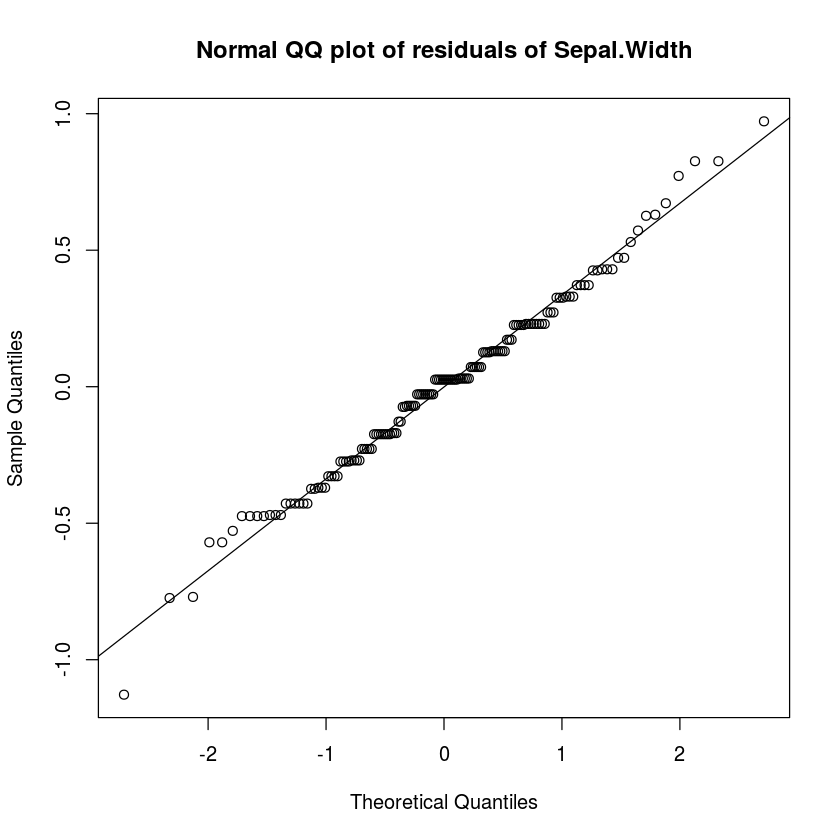

In [28]:
#Sepal.Width vs. Species
cat("Ratio between max and min: ",max(sepal.width.sd)/min(sepal.width.sd))
sepal.width.meancen <- iris$Sepal.Width-sepal.width.mean[as.numeric(iris$Species)]
qqnorm(sepal.width.meancen,main="Normal QQ plot of residuals of Sepal.Width")
qqline(sepal.width.meancen)

Ratio between max and min:  3.177945

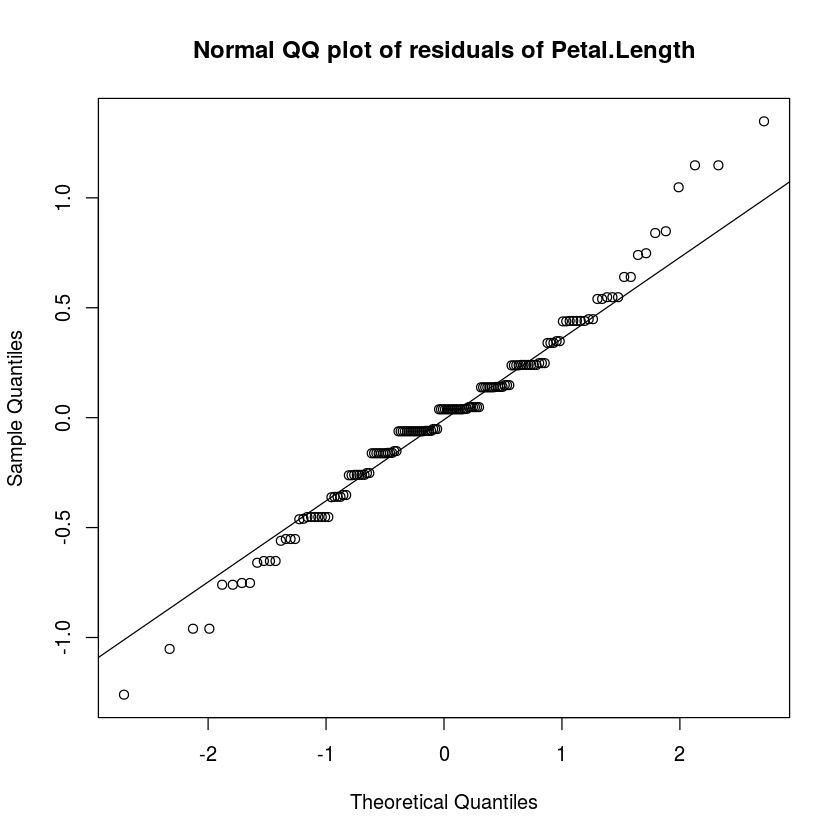

In [30]:
#Petal.length vs. Species
cat("Ratio between max and min: ",max(petal.length.sd)/min(petal.length.sd))
petal.length.meancen <- iris$Petal.Length-petal.length.mean[as.numeric(iris$Species)]
qqnorm(petal.length.meancen,main="Normal QQ plot of residuals of Petal.Length")
qqline(petal.length.meancen)

Ratio between max and min:  2.606144

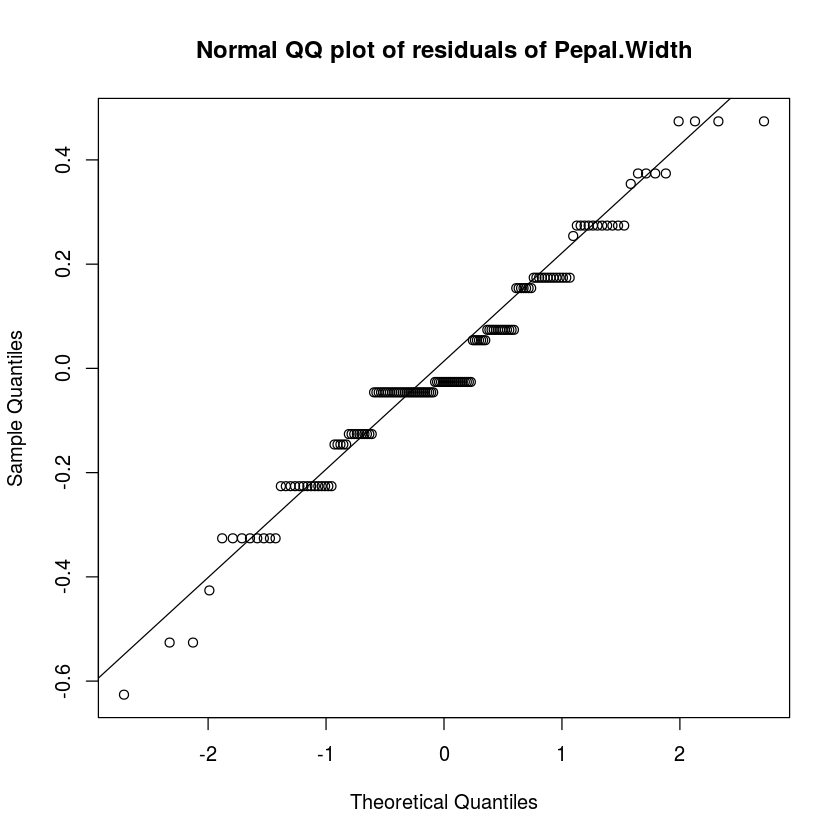

In [31]:
#Petal.Width vs. Species
cat("Ratio between max and min: ",max(petal.width.sd)/min(petal.width.sd))
petal.width.meancen <- iris$Petal.Width-petal.width.mean[as.numeric(iris$Species)]
qqnorm(petal.width.meancen,main="Normal QQ plot of residuals of Pepal.Width")
qqline(petal.width.meancen)

*** CONCLUSION: Based on the graph above, only Septal.Length would be suitable for ANOVA Test. ***

*** e. Carry out one-way ANOVA for any suitable measurement variables ***

In [37]:
site.anova <- aov(Sepal.Length~Species, data = iris)
summary(site.anova)

             Df Sum Sq Mean Sq F value Pr(>F)    
Species       2  63.21  31.606   119.3 <2e-16 ***
Residuals   147  38.96   0.265                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Since p-value is much less than 0. We can reject Ho. 